In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

## 1. Data understanding

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

## Data Cleaning and prepration
#### get the count of number of null values in each of the columns of the dataset

In [6]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

#### get the count of number of null values in each of the rows 

In [7]:
df.isnull().sum(axis=1).sort_values(ascending = False)

1011    15
533     15
1218    15
39      15
705     14
        ..
21       2
439      2
1210     2
1386     1
1328     1
Length: 1460, dtype: int64

In [8]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index([], dtype='object')

#### Check for the duplicated columns

In [9]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

#### dropping the reduntant column 'id' which has recorded index values

In [10]:
df.drop(['Id'],axis=1,inplace=True)

#### updating NA values of 'PoolQC','MiscFeature','Alley','Fence' as per the definitions in the data dictonary

In [11]:
df[['PoolQC','MiscFeature','Alley','Fence']] = df[['PoolQC','MiscFeature','Alley','Fence']].fillna('No')
df.isnull().sum().sort_values(ascending = False)

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
Foundation         0
ExterQual          0
ExterCond          0
LotConfig          0
MSZoning           0
BsmtFinSF1         0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
LotArea            0
Street             0
BsmtFinSF2         0
Alley              0
OverallQual        0
HouseStyle         0
LotShape           0
LandContour        0
BldgType           0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
SalePrice          0
HeatingQC          0
BsmtUnfSF          0
TotalBsmtSF        0
GarageArea         0
PavedDrive   

In [12]:
df['BsmtQual'] = df['BsmtQual'].fillna('No')

### missing value imputation by using data dictionary 

In [13]:
#imputing missing values 
df['LotFrontage'].isnull().sum()

#since LotFrontage - Linear feet of street connected to property, NA is equal to 0 as no street is connected to property

df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [14]:
df['FireplaceQu'].value_counts()
#FireplaceQu: Fireplace quality, as per data dictronary NA is no fire place
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')

In [15]:
df['GarageCond'].value_counts()
#GarageCond: Garage condition, as per data dictronary NA is no garage
df['GarageCond'] = df['GarageCond'].fillna('No')

In [16]:
df['GarageType'].value_counts()
#GarageType: Garage location, as per data dictronary NA is no garage
df['GarageType'] = df['GarageType'].fillna('No')

In [17]:
df['GarageYrBlt'].value_counts()
#GarageYrBlt: Garage year built, as per data dictronary NA is no garage
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('No')

In [18]:
df['GarageFinish'].value_counts()
#GarageFinish: Interior finish of the garage, as per data dictronary NA is no garage
df['GarageFinish'] = df['GarageFinish'].fillna('No')

In [19]:
df['GarageQual'].value_counts()
#GarageQual: Garage quality, as per data dictronary NA is no garage
df['GarageQual'] = df['GarageQual'].fillna('No')

In [20]:
df['BsmtExposure'].value_counts()
#BsmtExposure: Refers to walkout or garden level walls, as per data dictronary NA is no basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [21]:
df['BsmtFinType2'].value_counts()
#BsmtExposure: Refers to walkout or garden level walls, as per data dictronary NA is no basement
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')

In [22]:
df['BsmtFinType1'].value_counts()
#BsmtFinType1: Refers to walkout or garden level walls, as per data dictronary NA is no basement
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')

In [23]:
df['BsmtCond'].value_counts()
#BsmtCond: Refers to walkout or garden level walls, as per data dictronary NA is no basement
df['BsmtCond'] = df['BsmtCond'].fillna('No')

In [24]:
df['BsmtQual'].value_counts()
#BsmtQual: Refers to walkout or garden level walls, as per data dictronary NA is no basement
df['BsmtQual'] = df['BsmtQual'].fillna('No')

In [25]:
#Since there is no defention for NA values in MasVnrArea,MasVnrType and Electrical,will these missing values as these are less 

In [26]:
df.isnull().sum().sort_values(ascending = False)

MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
BsmtQual         0
Heating          0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
OverallCond      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars       0
PoolQC      

In [27]:
#Since there is no defention for NA values in MasVnrArea,MasVnrType and Electrical,will these missing values as these are less 
df = df.dropna()
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1451.000000  1451.000000    1451.000000  1451.000000  1451.000000  1451.000000   1451.000000  1451.00000  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000   1451.000000  1451.000000   1451.000000   1451.000000  1451.000000  1451.000000   1451.000000   1451.000000   1451.000000  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000    1451.000000  1451.000000  1451.000000  1451.000000   1451.000000  1451.000000  1451.000000    1451.000000
mean     56.933150    57.624397   10507.808408     6.093728     5.579600  1971.092350   1984.760165   103.75672   442.274983    46.838043   567.197105  1056.310131  1161.551344   346.742247      5.880772  1514.174363      0.423846      0.057891     1.562371     0.381116      2.866988      1.046175      6.516885     0.612681     1.764990   472.525155    94.412819    46.422467      21.952447     3.430737    15.154376     2.776017     43.758787     6.319090  2007.815300  180624.101999
std      42.350366    34.655808    9992.987081     1.381467     1.113415    30.190266     20.651334   181.10815   455.369276   161.777324   442.209192   437.914609   385.002532   436.453277     48.771560   525.799521      0.518842      0.239449     0.550301     0.502574      0.815086      0.219571      1.626576     0.643443     0.748728   214.171752   125.436852    66.060150      61.108223    29.406940    55.917522    40.301212    497.648467     2.700353     1.329376   79312.128273
min      20.000000     0.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.00000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    42.000000    7537.500000     5.000000     5.000000  1954.000000   1966.000000     0.00000     0.000000     0.000000   222.000000   795.000000   882.000000     0.000000      0.000000  1128.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000     1.000000   327.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129900.000000
50%      50.000000    63.000000    9477.000000     6.000000     5.000000  1972.000000   1993.000000     0.00000   381.000000     0.000000   479.000000   991.000000  1086.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000     2.000000   478.000000     0.000000    24.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  162500.000000
75%      70.000000    79.000000   11600.000000     7.000000     6.000000  2000.000000   2004.000000   166.00000   707.000000     0.000000   808.000000  1297.500000  1391.000000   728.000000      0.000000  1776.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.00000 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

### Understanding the corelation of the dataset 

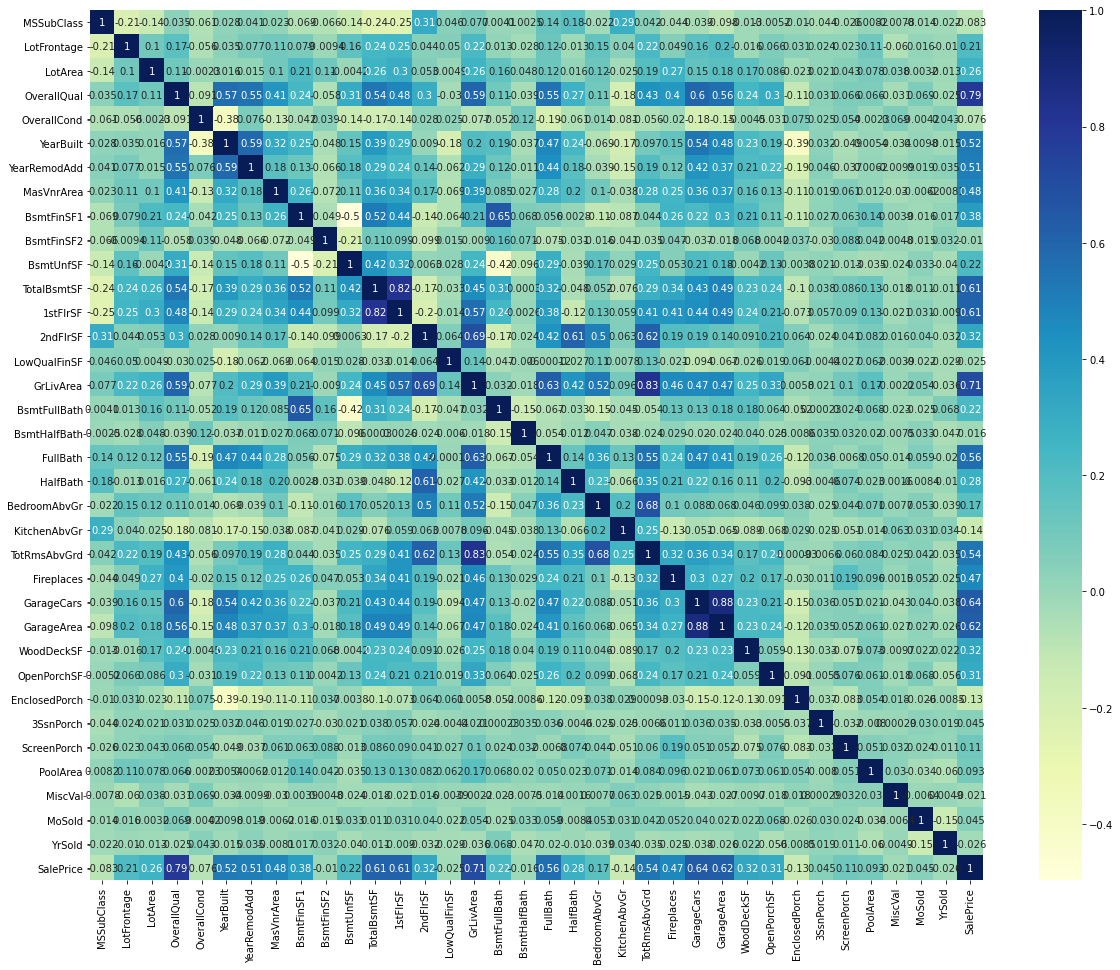

In [29]:
cor = df.corr()
# figure size
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

##### Some of the variables have high co-linearity between each other,also there is mismatch in type for categorical varibles which are being shown here.

In [30]:
#Analysis of 'LotArea' column
df['LotArea'].value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
9453      1
9450      1
15593     1
7399      1
11249     1
Name: LotArea, Length: 1066, dtype: int64

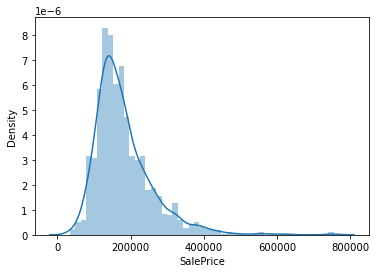

In [31]:
#Analysis of the target variable column
sns.distplot(df['SalePrice'])
plt.show()

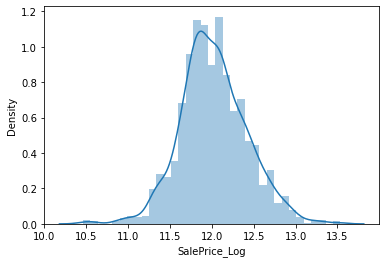

In [32]:
#SalesPrice data is skewed to the left, peroforming log transform on the SalePrice
df['SalePrice_Log'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice_Log'])
plt.show()
del df['SalePrice']

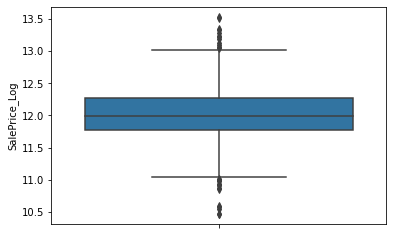

In [33]:
#Boxplot on the Target log transformed variable
sns.boxplot(y=df['SalePrice_Log'])
plt.show()

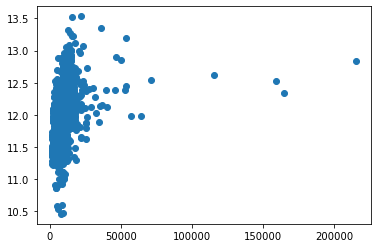

In [34]:
plt.scatter(x=(df['LotArea']),y=(df['SalePrice_Log']))
plt.show()
#applying transformation on 'LotArea' to establish the linear relationship with target variable

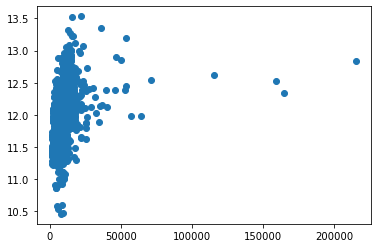

In [35]:
#df['LotArea_log'] = np.log(df['LotArea'])
plt.scatter(x=(df['LotArea']),y=df['SalePrice_Log'])

#df['LotArea']
plt.show()

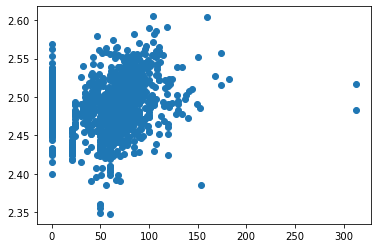

In [36]:
plt.scatter(x=(df['LotFrontage']),y=np.log(df['SalePrice_Log']))
#df['LotFrontage_log'] = np.log(df['LotFrontage'])
#del df['LotFrontage']
plt.show()

In [37]:
df['BsmtUnfSF'].value_counts()

0       118
728       9
384       7
572       7
600       7
       ... 
733       1
731       1
730       1
1502      1
2046      1
Name: BsmtUnfSF, Length: 777, dtype: int64

In [38]:
df['PoolArea'].value_counts()

0      1444
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [39]:
df['LowQualFinSF'].value_counts()

0      1425
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [41]:
#setting correct datatype for the categorical variables in the dataset

In [42]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')
df['YearBuilt'] = df['YearBuilt'].astype('object')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['BsmtHalfBath'].astype('object')
df['HalfBath'] = df['BsmtHalfBath'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  YearBuil

In [44]:
df['BedroomAbvGr'].value_counts()

3    800
2    356
4    211
1     49
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [45]:
#Selecting categorical variables from the dataset

In [46]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature MoSold YrSold SaleType SaleCondition
0         60       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5      2003         2003     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr            1            0        0        0            3            1          Gd            8        Typ          0          No     Attchd        2003          RFn          2         TA         TA          Y     No    No          No      2   2008       WD        Normal
1         20       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8      1976         1976     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr            0            1        1        1            3            1          TA            6        Typ          1          TA     Attchd        1976          RFn          2         TA         TA          Y     No    No          No      5   2007       WD        Normal
2         60       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5      2001         2002     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr            1            0        0        0            3            1          Gd            6        Typ          1          TA     Attchd        2001          RFn          2         TA         TA          Y     No    No          No      9   2008       WD        Normal
3         70       RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5      1915         1970     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr            1            0        0        0            3            1          Gd            7        Typ          1          Gd     Detchd        1998          Unf          3         TA         TA          Y     No    No          No      2   2006       WD       Abnorml
4         60       RL   Pave    No      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5      2000         2000     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr            1            0        0        0            4            1          Gd            9        Typ          1          TA     Attchd        2000          RFn          3         TA         TA          Y     No    No          No     12   2008       WD        Normal

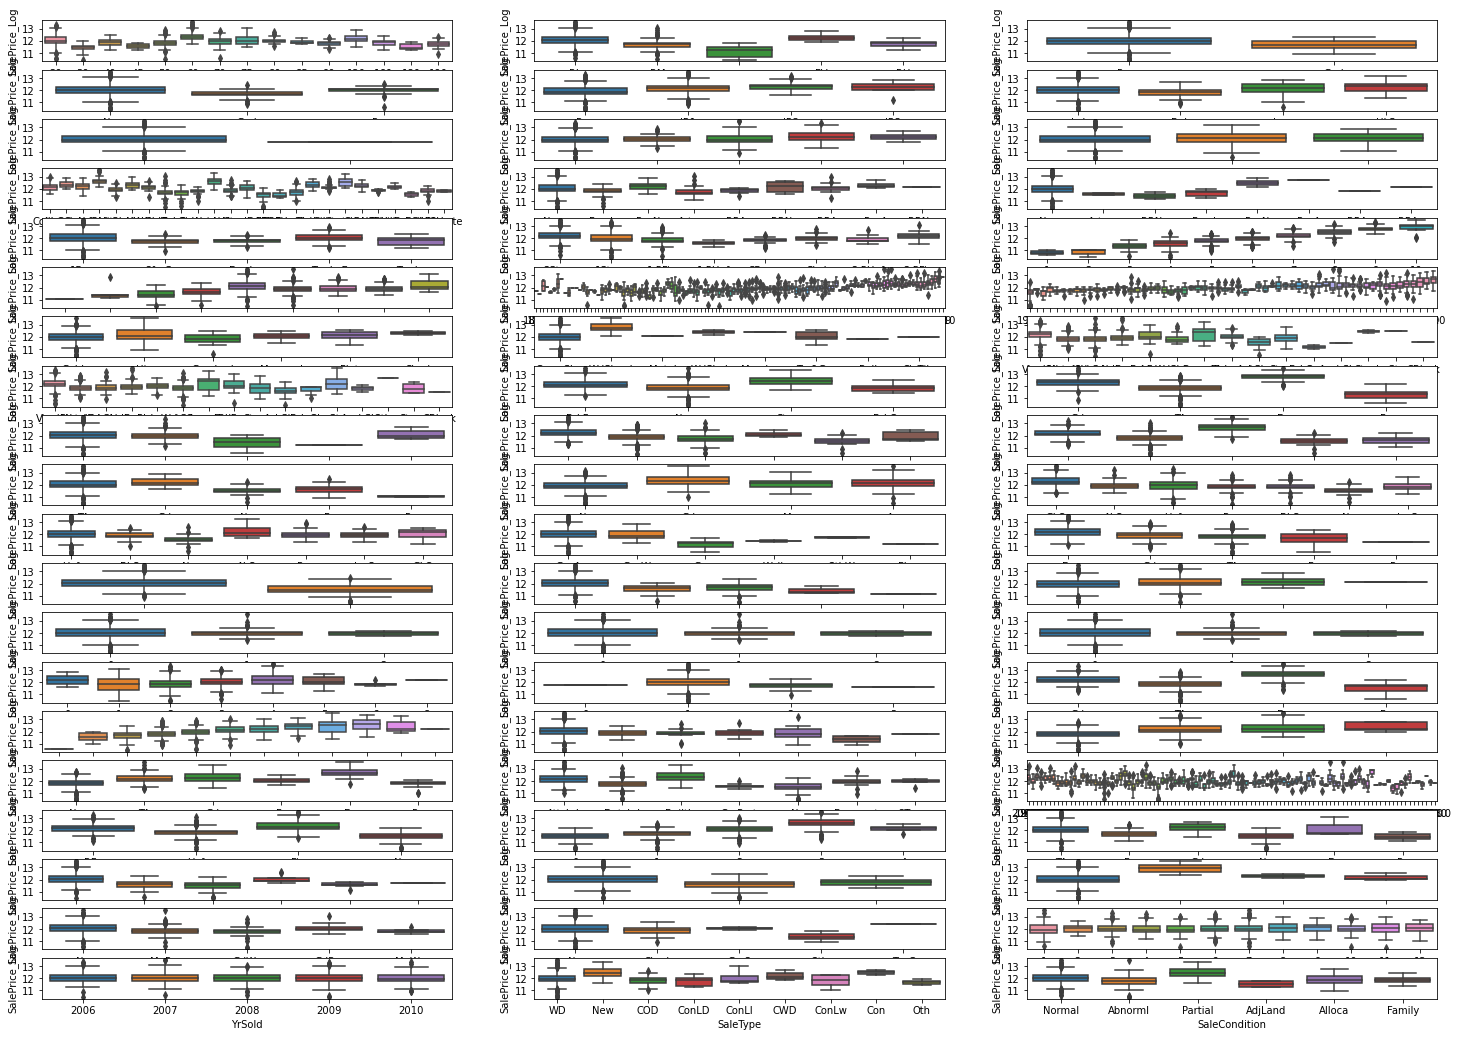

In [47]:
#Categorical variables vs response variable using boxplots to understand the data distribution
#for some of the variabels the variation of the data is low, median is identical, seems to have lees corelation with the response variable.

plt.figure(figsize=(25 ,18))
variables = list(df_categorical.columns)  
for i, c in enumerate(variables, 1):
    plt.subplot(20,3,i) 
    sns.boxplot(x=c, y="SalePrice_Log",data=df)


In [48]:
# creating dummy variabels for the all the categorical variables 
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  ...  GarageQual_Gd  GarageQual_No  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_No  GarageCond_Po  GarageCond_TA  \
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1         1           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0  ...              0              0              0              1              0              0              0              0              1   
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1         1           0             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0  ...              0              0              0              1              0              0              0              0              1   
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1         1           0             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0  ...              0              0              0              1              0              0              0              0              1   

In [49]:
# dropping the categorical variables and concatinating the dummy varibles to make them numerical
df = df.drop(list(df_categorical.columns), axis=1)


df = pd.concat([df, df_dummies], axis=1)

In [50]:
# Analysis of the numerical variabels in the dataset

df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice_Log
0            65.0     8450       196.0         706           0        150          856       856       854             0       1710         548           0           61              0          0            0         0        0      12.247694
1            80.0     9600         0.0         978           0        284         1262      1262         0             0       1262         460         298            0              0          0            0         0        0      12.109011
2            68.0    11250       162.0         486           0        434          920       920       866             0       1786         608           0           42              0          0            0         0        0      12.317167
3            60.0     9550         0.0         216           0        540          756       961       756             0       1717         642           0           35            272          0            0         0        0      11.849398
4            84.0    14260       350.0         655           0        490         1145      1145      1053             0       2198         836         192           84              0          0            0         0        0      12.429216
...           ...      ...         ...         ...         ...        ...          ...       ...       ...           ...        ...         ...         ...          ...            ...        ...          ...       ...      ...            ...
1455         62.0     7917         0.0           0           0        953          953       953       694             0       1647         460           0           40              0          0            0         0        0      12.072541
1456         85.0    13175       119.0         790         163        589         1542      2073         0             0       2073         500         349            0              0          0            0         0        0      12.254863
1457         66.0     9042         0.0         275           0        877         1152      1188      1152             0       2340         252           0           60              0          0            0         0     2500      12.493130
1458         68.0     9717         0.0          49        1029          0         1078      1078         0             0       1078         240         366            0            112          0            0         0        0      11.864462
1459         75.0     9937         0.0         830         290        136         1256      1256         0             0       1256         276         736           68              0          0            0         0        0      11.901583

[1451 rows x 20 columns]

In [51]:
### understanding the outliner in the continious variabels in the dataset
quant_df = df_numeric.quantile([0.01,.05,0.1,0.5,0.75,0.9,0.95,0.99,1])
quant_df

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice_Log
0.01          0.0    1680.0         0.0         0.0         0.0        0.0          0.0     520.0       0.0           0.0      692.0         0.0         0.0          0.0            0.0        0.0          0.0       0.0      0.0      11.029839
0.05          0.0    3273.0         0.0         0.0         0.0        0.0        520.0     672.5       0.0           0.0      848.0         0.0         0.0          0.0            0.0        0.0          0.0       0.0      0.0      11.385092
0.10          0.0    5000.0         0.0         0.0         0.0       74.0        637.0     757.0       0.0           0.0      912.0       240.0         0.0          0.0            0.0        0.0          0.0       0.0      0.0      11.573550
0.50         63.0    9477.0         0.0       381.0         0.0      479.0        991.0    1086.0       0.0           0.0     1464.0       478.0         0.0         24.0            0.0        0.0          0.0       0.0      0.0      11.998433
0.75         79.0   11600.0       166.0       707.0         0.0      808.0       1297.5    1391.0     728.0           0.0     1776.0       576.0       168.0         68.0            0.0        0.0          0.0       0.0      0.0      12.273731
0.90         92.0   14375.0       335.0      1064.0       119.0     1232.0       1602.0    1680.0     954.0           0.0     2158.0       757.0       262.0        130.0          112.0        0.0          0.0       0.0      0.0      12.535376
0.95        104.0   17308.5       456.0      1272.0       398.0     1468.0       1749.0    1827.0    1141.5           0.0     2464.0       849.0       335.0        173.0          180.0        0.0        160.0       0.0      0.0      12.694076
0.99        137.5   37802.0       792.0      1572.5       832.0     1797.5       2155.5    2212.0    1420.0         360.0     3126.0      1004.5       506.0        286.0          261.5      168.0        268.5       0.0    700.0      12.993142
1.00        313.0  215245.0      1600.0      5644.0      1474.0     2336.0       6110.0    4692.0    2065.0         572.0     5642.0      1418.0       857.0        547.0          552.0      508.0        480.0     738.0  15500.0      13.534473

In [52]:
# there are high amount of outliners in 99th-100th percentile range 

In [53]:
#outliner removal from the dataset
def drop_outliers(x):
    list = []
    for col in df_numeric:
        Q1 = x[col].quantile(.01)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [54]:
df.shape

(1432, 593)

In [55]:
#re-inspecting the percentiles in the dataset after outliner removal
quant_df = df.quantile([.05,0.1,0.5,0.75,0.9,0.95,0.99,1])
quant_df

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice_Log  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  ...  GarageQual_Gd  GarageQual_No  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_No  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  PoolQC_Fa  PoolQC_Gd  PoolQC_No  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_No  MiscFeature_No  MiscFeature_Othr  MiscFeature_Shed  \
0.05          0.0   3230.00        0.00        0.00        0.00       0.00       520.00    674.65      0.00          0.00     848.00        0.00        0.00         0.00           0.00       0.00         0.00       0.0      0.0      11.385092            0.0            0.0            0.0            0.0            0.0            0.0           0.00            0.0            0.0            0.0             0.0             0.0             0.0             0.0          0.0          0.0          0.0          0.0          1.0       0.0         0.0           0.0           0.0           0.0              0.0              0.0              0.0               0.0                0.0            0.0  ...            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0           0.0           0.0        0.0        0.0        1.0         0.0          0.0         0.0       0.0             1.0               0.0               0.0   
0.10          0.0   5000.00        0.00        0.00        0.00      74.10       636.10    757.00      0.00          0.00     910.20      240.00        0.00         0.00           0.00       0.00         0.00       0.0      0.0      11.571430            0.0            0.0            0.0            0.0            0.0            0.0           0.00            0.0            0.0            0.0             0.0             0.0             0.0             0.0          0.0          0.0          0.0          0.0          1.0       1.0         0.0           0.0           0.0           0.0              0.0              0.0              0.1               0.0                0.0            0.0  ...            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            1.0           0.0           1.0        0.0        0.0        1.0         0.0          0.0         0.0       0.0             1.0               0.0               0.0   
0.50         63.0   9423.00        0.00      378.00        0.00     481.50       989.00   1080.00      0.00          0.00    1458.00      478.00        0.00        24.50           0.00       0.00         0.00       0.0      0.0      11.993034            0.0            0.0            0.0            0.0            0.0            0.0           0.00            0.0            0.0            0.0             0.0             0.0             0.0             0.0          0.0          0.0          1.0          0.0          1.0       1.0         0.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0            0.0  ...            0.0            0.0            0.0            1.0            0.0            0.0            0.0            0.0            1.0           0.0           1.0        0.0        0.0        1.0         0.0          0.0         0.0       1.0             1.0               0.0               0.0   
0.75         79.0  11500.00      166.0

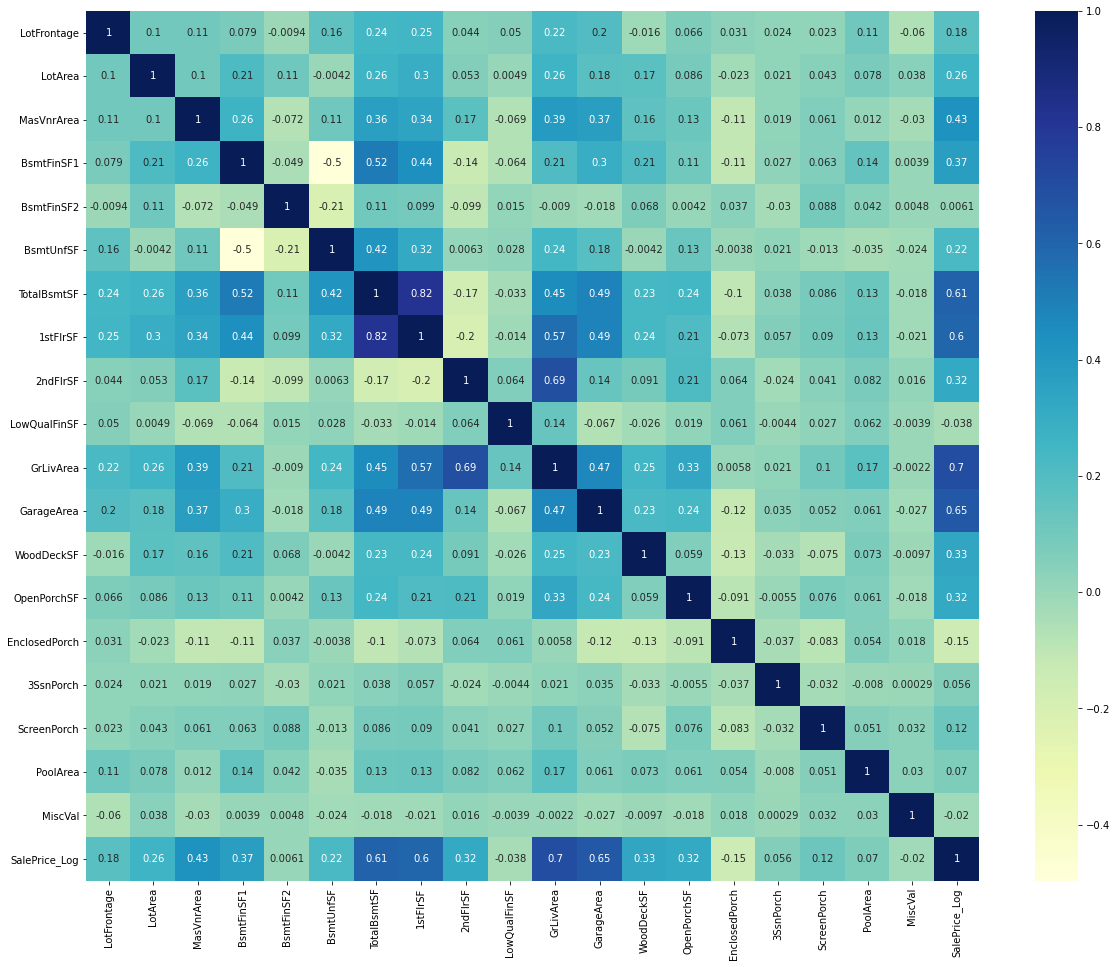

In [56]:
#understnding the co-realtion of the numerical varibles in the dataset.
#some of the variabels have high colinreality coefficient>0.8 wich can cause multi-collinearity issues in the model.
cor = df_numeric.corr()
# figure size
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

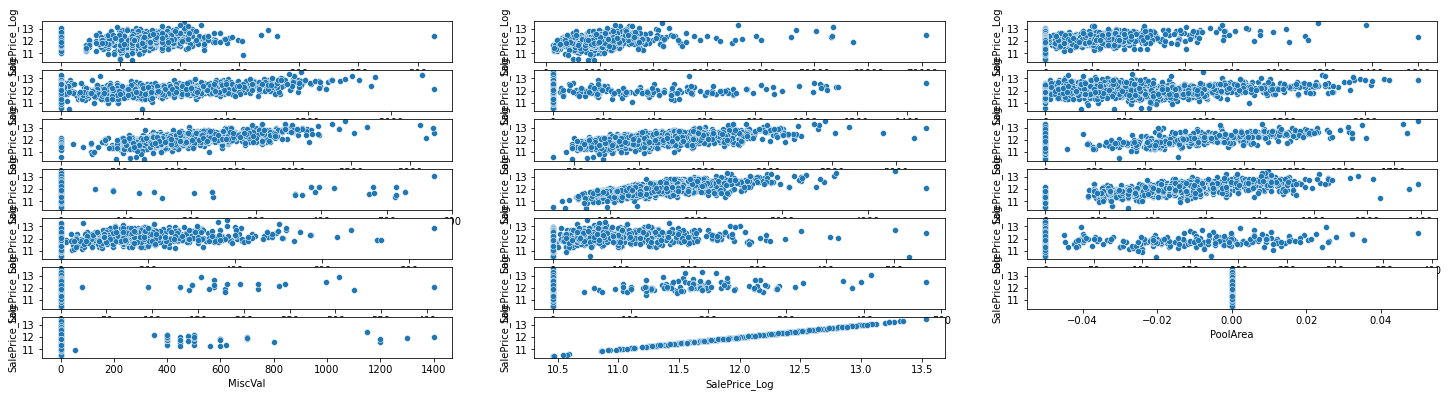

In [57]:
#numnerical data distribution with response variable to understnd the relationship of the response and independent varibles
plt.figure(figsize=(25, 18))
variables = list(df_numeric.columns)  
for i, c in enumerate(variables, 1):
    plt.subplot(20,3,i) 
    sns.scatterplot(x=c, y="SalePrice_Log",data=df)

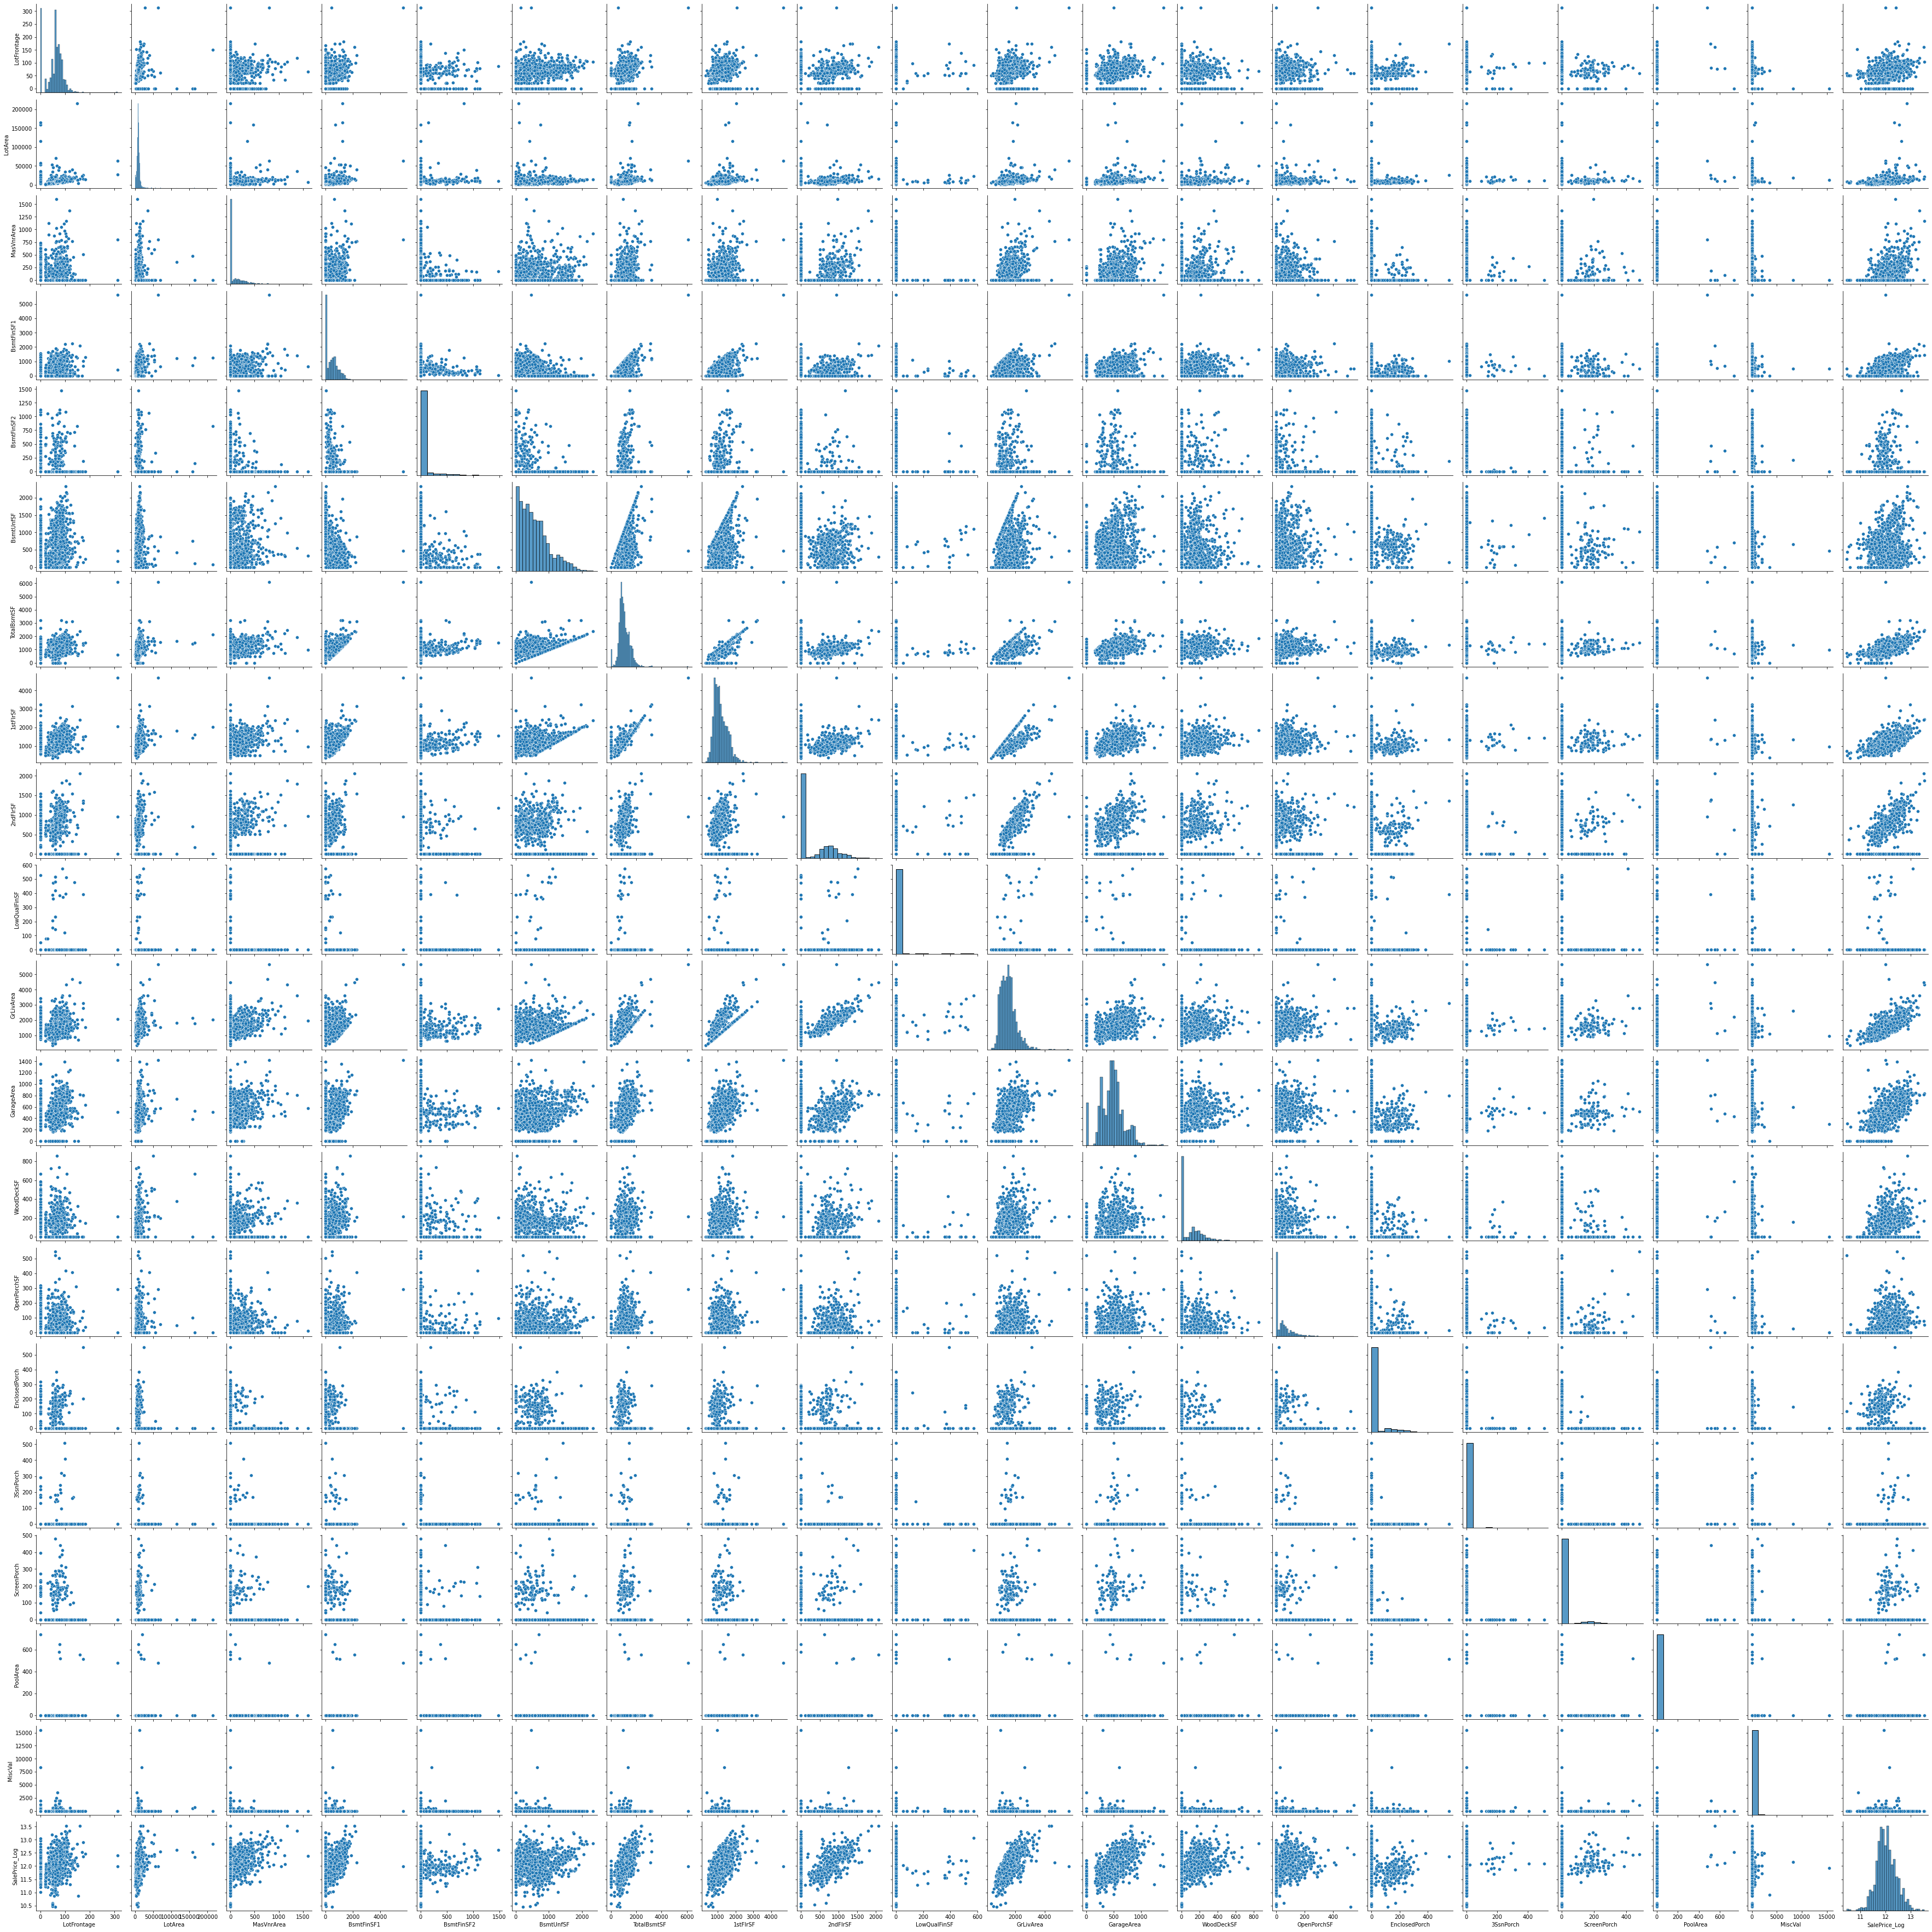

In [58]:
sns.pairplot(df_numeric)
plt.show()

In [59]:
X= df.loc[:, df.columns != 'SalePrice_Log']
y =df['SalePrice_Log']
X.shape
#assigning X and Y varibles to the dataset, x has 592 attributes

(1432, 592)

In [60]:
# scaling the features 
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [61]:
#Splitting of the X and y to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=75)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

lm = LinearRegression()
lm.fit(X_train, y_train)
#using Recursive feature elimination as there are large number of atttributes and choosing only 100 attributes
rfe = RFE(lm, 100)
rfe = rfe.fit(X_train, y_train)

In [63]:
#final columns after the RFE
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

Condition2_PosA  Condition2_RRAe  Condition2_RRAn  YearBuilt_1882  YearBuilt_1892  YearBuilt_1893  YearBuilt_1898  YearBuilt_1906  YearBuilt_1910  YearBuilt_1911  YearBuilt_1913  YearBuilt_1914  YearBuilt_1920  YearBuilt_1923  YearBuilt_1927  YearBuilt_1932  YearBuilt_1937  YearBuilt_1949  YearBuilt_1951  YearBuilt_1952  YearBuilt_1956  YearBuilt_1957  YearBuilt_1959  YearBuilt_1960  YearBuilt_1968  YearBuilt_1972  YearBuilt_1976  YearBuilt_1977  YearBuilt_1980  YearBuilt_1983  YearBuilt_1985  YearBuilt_1987  YearBuilt_1988  YearBuilt_1989  YearBuilt_1990  YearBuilt_1992  YearBuilt_1993  YearBuilt_1994  YearBuilt_1995  YearBuilt_1996  YearBuilt_1997  YearBuilt_1998  YearBuilt_1999  YearBuilt_2000  YearBuilt_2002  YearBuilt_2003  YearBuilt_2004  YearBuilt_2005  YearBuilt_2006  YearBuilt_2007  YearBuilt_2008  YearBuilt_2009  YearRemodAdd_1951  YearRemodAdd_1952  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  \
846         -0.026435              0.0        -0.026435       -0.026435       -0.037398       -0.026435       -0.026435       -0.026435       -0.109609       -0.026435       -0.026435       -0.070088       -0.146281       -0.070088       -0.045819       -0.052926       -0.059193       -0.087983       -0.059193       -0.059193       -0.099363       -0.115959       -0.135986       -0.106299       -0.124911       -0.127764       -0.153585       -0.146281       -0.083859       -0.052926       -0.059193       -0.045819       -0.087983       -0.045819       -0.087983       -0.095715       -0.109609       -0.115959       -0.112827       -0.099363       -0.099363       -0.133298       -0.133298       -0.130558       -0.121996       -0.178046       -0.197958       -0.216295       -0.216295       -0.184215       -0.124911       -0.112827          -0.052926          -0.059193          0.130558         -0.026435       -0.026435      -0.026435         -0.083859         -0.059193   
630         -0.026435              0.0        -0.026435       -0.026435       -0.037398       -0.026435       -0.026435       -0.026435       -0.109609       -0.026435       -0.026435       -0.070088       -0.146281       -0.070088       -0.045819       -0.052926       -0.059193       -0.087983       -0.059193       -0.059193       -0.099363       -0.115959       -0.135986       -0.106299       -0.124911       -0.127764       -0.153585       -0.146281       -0.083859       -0.052926       -0.059193       -0.045819       -0.087983       -0.045819       -0.087983       -0.095715       -0.109609       -0.115959       -0.112827       -0.099363       -0.099363       -0.133298       -0.133298       -0.130558       -0.121996        5.616534       -0.197958       -0.216295       -0.216295       -0.184215       -0.124911       -0.112827          -0.052926          -0.059193          0.130558         -0.026435       -0.026435      -0.026435         -0.083859         -0.059193   
1206        -0.026435              0.0        -0.026435       -0.026435       -0.037398       -0.026435       -0.026435       -0.026435       -0.109609       -0.026435       -0.026435       -0.070088       -0.146281       -0.070088       -0.045819       -0.052926       -0.059193       -0.087983       -0.059193       -0.059193       -0.099363       -0.115959       -0.135986       -0.106299       -0.124911       -0.127764       -0.153585       -0.146281       -0.083859       -0.052926       -0.059193       -0.045819       -0.087983       -0.045819       -0.087983       -0.095715       -0.109609       -0.115959       -0.112827       -0.099363       -0.099363       -0.133298       -0.133298       -0.130558       -0.121996       -0.178046       -0.197958       -0.216295       -0.216295        5.428451       -0.124911       -0.112827          -0.052926          -0.059193          0.130558         -0.026435       -0.026435      -0.026435         -0.083859         -0.059193   
912         -0.026435              0.0        -0.026435       -0.02643

In [64]:
lm = sm.OLS(list(y_train),X_train_rfe).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     36.29
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          1.90e-225
Time:                        23:29:01   Log-Likelihood:                 184.63
No. Observations:                1002   AIC:                            -217.3
Df Residuals:                     926   BIC:                             155.9
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Condition2_PosA         0.0067    

In [65]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test[X_test.columns[rfe.support_]])


r2_train_rfe = r2_score(y_train, y_pred_train)
print("R2 value on training dataset using RFE :"+str(r2_train_rfe))


r2_test_rfe = r2_score(y_test, y_pred_test)
print("R2 value on test dataset using RFE :"+str(r2_test_rfe))


rss1_rfe = np.sum(np.square(y_train - y_pred_train))
print("RSS value on training dataset using RFE :"+str(rss1_rfe))


rss2_rfe = np.sum(np.square(y_test - y_pred_test))
print("R2 value on test dataset using RFE :"+str(rss2_rfe))


mse_train_rfe = mean_squared_error(y_train, y_pred_train)
print("MSE value on training dataset using RFE :"+str(mse_train_rfe))


mse_test_rfe = mean_squared_error(y_test, y_pred_test)
print("R2 value on training dataset using RFE :"+str(mse_test_rfe))


R2 value on training dataset using RFE :0.7461193433456026
R2 value on test dataset using RFE :-4.0234346177030436e+18
RSS value on training dataset using RFE :170.8787520780063
R2 value on test dataset using RFE :9.614899983187403e+19
MSE value on training dataset using RFE :0.04050196040831175
R2 value on training dataset using RFE :6.102069491023414e+17


### Regularisiation of the model using ridge regression

In [66]:
#Ridge Regression

#setting Alpha values list
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation number of folds
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    7.4s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha value for ridge regression
print(model_cv.best_params_)

{'alpha': 500}


In [68]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.34077103e-03  1.62813585e-02  9.29507534e-03  2.19170969e-02
  4.34379445e-03  3.03248907e-03  2.77023064e-02  3.07618685e-02
  1.61505601e-02 -9.37651969e-04  3.63201700e-02  1.40761208e-02
  1.20475486e-02  9.16199643e-03 -2.16527322e-03  3.20805650e-03
  9.99413452e-03  0.00000000e+00  1.32834568e-03 -1.32707311e-02
 -7.37416622e-04 -7.46498854e-04 -1.38682133e-03  8.54195210e-03
  2.23621652e-03  1.92570980e-03 -1.02306993e-03 -1.07955237e-03
  4.70817560e-04 -1.88665420e-03 -6.69657541e-03 -3.42429732e-03
  1.15766596e-03  7.97484539e-03 -7.00802123e-04  1.21862243e-02
 -6.06232970e-03  4.27582843e-03  1.85588171e-03  2.30786165e-03
  2.53363210e-03  8.80686899e-04 -2.15139402e-03  3.79016976e-03
 -2.02105570e-03  1.11632678e-03 -3.13909243e-03  5.76764419e-03
 -4.45301660e-03  4.38391431e-04 -4.97648627e-03  2.53023840e-04
 -5.83858036e-03  1.27863644e-03 -2.41820644e-03  1.23410190e-03
  2.83047992e-03 -1.60502220e-03  1.34249922e-02 -6.54727454e-03
 -3.69794817e-03 -1.14066

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


r2_train_rid = r2_score(y_train, y_pred_train)
print("r2 value on training dataset using Ridge Regression :"+str(r2_train_rid))


r2_test_rid = r2_score(y_test, y_pred_test)
print("r2 value on test dataset using Ridge Regression :"+str(r2_test_rid))


rss1_rid = np.sum(np.square(y_train - y_pred_train))
print("rss value on train dataset using Ridge Regression :"+str(rss1_rid))


rss2_rid = np.sum(np.square(y_test - y_pred_test))
print("rss value on test dataset using Ridge Regression :"+str( rss2_rid))


mse_train_rid = mean_squared_error(y_train, y_pred_train)
print("mse value on train dataset using Ridge Regression :"+str( mse_train_rid))


mse_test_rid = mean_squared_error(y_test, y_pred_test)
print("mse value on test dataset using Ridge Regression :"+str( mse_test_rid))


r2 value on training dataset using Ridge Regression :0.9482706289629425
r2 value on test dataset using Ridge Regression :0.8612665004550237
rss value on train dataset using Ridge Regression :8.26896876363027
rss value on test dataset using Ridge Regression :9.04752929324427
mse value on train dataset using Ridge Regression :0.008252463835958353
mse value on test dataset using Ridge Regression :0.02104076579824249


In [70]:
### Using Lasso Model

In [71]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    9.3s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [73]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [74]:
lasso.coef_

array([ 4.05218928e-03,  2.14152606e-02,  0.00000000e+00,  3.76504487e-02,
        3.99730002e-03, -0.00000000e+00,  3.88327178e-02,  1.97051063e-03,
        0.00000000e+00, -2.59492300e-03,  1.38160027e-01,  1.18050700e-02,
        1.32736853e-02,  6.33251019e-03,  0.00000000e+00,  2.74247057e-03,
        1.11877158e-02,  0.00000000e+00,  0.00000000e+00, -1.01458182e-02,
       -1.29999404e-03,  0.00000000e+00, -1.04535504e-02,  8.74409235e-04,
       -7.06230898e-03, -0.00000000e+00,  5.24935762e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.03126719e-02, -0.00000000e+00,
        0.00000000e+00,  4.71836538e-02,  1.67826970e-02,  7.88714175e-02,
        4.36763033e-02,  1.85287614e-03,  0.00000000e+00, -7.20654016e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.38455918e-04,
       -0.00000000e+00,  0.00000000e+00, -8.78337125e-04,  4.23741427e-03,
       -5.76660993e-03,  0.00000000e+00, -6.82126297e-03, -2.33127243e-03,
       -1.30347952e-02,  

In [75]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train)
print("r2 value on training dataset using lasso Regression :"+str(r2_train_lasso))


r2_test_lasso = r2_score(y_test, y_pred_test)
print("r2 value on test dataset using lasso Regression :"+str(r2_test_lasso))


rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("rss value on train dataset using lasso Regression :"+str(rss1_lasso))


rss2_lasso= np.sum(np.square(y_test - y_pred_test))
print("rss value on test dataset using lasso Regression :"+str( rss2_lasso))


mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("mse value on train dataset using lasso Regression :"+str( mse_train_lasso))


mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("mse value on test dataset using lasso Regression :"+str( mse_test_lasso))

r2 value on training dataset using lasso Regression :0.965077910001262
r2 value on test dataset using lasso Regression :0.8432507406333101
rss value on train dataset using lasso Regression :5.582315531216929
rss value on test dataset using lasso Regression :10.222430202264913
mse value on train dataset using lasso Regression :0.005571173184847234
mse value on test dataset using lasso Regression :0.023773093493639333


In [76]:
#Lasso regression model is sutiable this analysis with better metric values and also eliminiates the redundant features by eeuation them to zero and simplfyin the model

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(100)

betas['Lasso'].sort_values(ascending=False).head(10)

GrLivArea               0.138160
MSZoning_RL             0.078871
MSZoning_FV             0.047184
MSZoning_RM             0.043676
TotalBsmtSF             0.038833
BsmtFinSF1              0.037650
OverallQual_9           0.030316
CentralAir_Y            0.027132
OverallQual_8           0.026518
SaleCondition_Normal    0.024140
Name: Lasso, dtype: float64

In [77]:
#top 10 
betas['Lasso_abs'] = betas['Lasso'].abs()
betas['Lasso_abs'].sort_values(ascending=False).head(10)

GrLivArea         0.138160
MSZoning_RL       0.078871
MSZoning_FV       0.047184
MSZoning_RM       0.043676
TotalBsmtSF       0.038833
BsmtFinSF1        0.037650
OverallQual_9     0.030316
YearBuilt_1946    0.027506
CentralAir_Y      0.027132
OverallQual_8     0.026518
Name: Lasso_abs, dtype: float64

In [78]:
betas['Ridge_abs'] = betas['Ridge'].abs()
betas['Ridge_abs'].sort_values(ascending=False).head(10)

GrLivArea        0.036320
1stFlrSF         0.030762
TotalBsmtSF      0.027702
BsmtFinSF1       0.021917
OverallQual_9    0.018616
OverallCond_3    0.018596
CentralAir_Y     0.017376
LotArea          0.016281
2ndFlrSF         0.016151
OverallQual_4    0.015499
Name: Ridge_abs, dtype: float64

In [79]:
betas['Ridge'].sort_values(ascending=False).head(10)

GrLivArea          0.036320
1stFlrSF           0.030762
TotalBsmtSF        0.027702
BsmtFinSF1         0.021917
OverallQual_9      0.018616
CentralAir_Y       0.017376
LotArea            0.016281
2ndFlrSF           0.016151
OverallQual_8      0.015436
BsmtExposure_Gd    0.014220
Name: Ridge, dtype: float64

In [80]:
#double the value of Alhpa for ridge regression 
alpha = 500*2
ridgeDouble = Ridge(alpha=alpha)

ridgeDouble.fit(X_train, y_train)
print(ridgeDouble.coef_)

[ 5.44661682e-03  1.45202445e-02  9.88788459e-03  1.84345254e-02
  3.35506216e-03  3.30419304e-03  2.39888814e-02  2.64462409e-02
  1.34719123e-02 -8.65170021e-04  3.08661521e-02  1.44002687e-02
  1.03127980e-02  8.91329143e-03 -2.25333025e-03  2.70471552e-03
  8.54942618e-03  0.00000000e+00  6.80313270e-04 -1.28093884e-02
 -2.98242440e-04 -6.91227618e-04 -1.01611564e-03  8.20540928e-03
  3.05150531e-03  1.57947343e-03 -1.04569201e-03 -7.98829823e-04
  8.65937127e-05 -1.21394073e-03 -5.70606129e-03 -3.58807165e-03
  6.93553428e-04  5.64875415e-03 -9.84385573e-04  1.01974793e-02
 -7.07477845e-03  4.24698351e-03  1.72058803e-03  2.17461819e-03
  3.00294725e-03  3.44128259e-04 -3.92672769e-03  3.96268679e-03
 -1.65979550e-03  5.71633425e-04 -2.68557276e-03  5.40441946e-03
 -3.05259440e-03  3.59638391e-04 -3.81299145e-03  6.73735256e-04
 -3.93972556e-03  8.26847577e-04 -2.66765675e-03  2.90547995e-04
  2.75134591e-03 -1.36007085e-03  1.06435270e-02 -5.98161668e-03
 -2.92497472e-03 -9.84929

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)


r2_train_rid = r2_score(y_train, y_pred_train)
print("r2 value on training dataset using Ridge Regression :"+str(r2_train_rid))


r2_test_rid = r2_score(y_test, y_pred_test)
print("r2 value on test dataset using Ridge Regression :"+str(r2_test_rid))


rss1_rid = np.sum(np.square(y_train - y_pred_train))
print("rss value on train dataset using Ridge Regression :"+str(rss1_rid))


rss2_rid = np.sum(np.square(y_test - y_pred_test))
print("rss value on test dataset using Ridge Regression :"+str( rss2_rid))


mse_train_rid = mean_squared_error(y_train, y_pred_train)
print("mse value on train dataset using Ridge Regression :"+str( mse_train_rid))


mse_test_rid = mean_squared_error(y_test, y_pred_test)
print("mse value on test dataset using Ridge Regression :"+str( mse_test_rid))


r2 value on training dataset using Ridge Regression :0.9326080097352037
r2 value on test dataset using Ridge Regression :0.8610796827602023
rss value on train dataset using Ridge Regression :10.772647168264761
rss value on test dataset using Ridge Regression :9.059712641692458
mse value on train dataset using Ridge Regression :0.010751144878507746
mse value on test dataset using Ridge Regression :0.021069099166726647


In [82]:
#Ridge regression model when alpha value is doubled

betasDouble = pd.DataFrame(index=X.columns)
betasDouble.rows = X.columns

betasDouble['Ridge'] = ridgeDouble.coef_


betasDouble.sort_values(by='Ridge',ascending=False).head(10)

Ridge
GrLivArea      0.030866
1stFlrSF       0.026446
TotalBsmtSF    0.023989
BsmtFinSF1     0.018435
OverallQual_9  0.015563
LotArea        0.014520
GarageArea     0.014400
CentralAir_Y   0.014038
2ndFlrSF       0.013472
OverallQual_8  0.013353

In [83]:
#Lasso regression model when alpha value is doubled
alpha =0.001*2

lassoDouble = Lasso(alpha=alpha)
        
lassoDouble.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [84]:
y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train)
print("r2 value on training dataset using lasso Regression :"+str(r2_train_lasso))


r2_test_lasso = r2_score(y_test, y_pred_test)
print("r2 value on test dataset using lasso Regression :"+str(r2_test_lasso))


rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("rss value on train dataset using lasso Regression :"+str(rss1_lasso))


rss2_lasso= np.sum(np.square(y_test - y_pred_test))
print("rss value on test dataset using lasso Regression :"+str( rss2_lasso))


mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("mse value on train dataset using lasso Regression :"+str( mse_train_lasso))


mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("mse value on test dataset using lasso Regression :"+str( mse_test_lasso))

r2 value on training dataset using lasso Regression :0.9553046427897006
r2 value on test dataset using lasso Regression :0.8519191099529513
rss value on train dataset using lasso Regression :7.144577736823862
rss value on test dataset using lasso Regression :9.657120989988545
mse value on train dataset using lasso Regression :0.007130317102618625
mse value on test dataset using lasso Regression :0.022458420906950105


In [85]:
betasDouble = pd.DataFrame(index=X.columns)
betasDouble.rows = X.columns

betasDouble['Lasso'] = lassoDouble.coef_


betasDouble.sort_values(by='Lasso',ascending=False).head(10)

Lasso
GrLivArea              0.133550
TotalBsmtSF            0.045959
BsmtFinSF1             0.034376
OverallQual_9          0.031403
OverallQual_8          0.026774
CentralAir_Y           0.024747
MSZoning_RL            0.023761
SaleCondition_Normal   0.023485
SaleCondition_Partial  0.021872
LotArea                0.020544

In [86]:
#lasso drop 5 most important features

cols = ['GrLivArea','MSZoning_RL','MSZoning_FV','MSZoning_RM','TotalBsmtSF', 'BsmtFinSF1']    

X_train_new = X_train.copy()
X_test_new = X_test.copy()

In [87]:
for col in cols:
    del X_train_new[col]
    del X_test_new[col]

In [88]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    8.8s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [90]:
#Lasso regression model when top5 are removed


alpha =0.01

lassoTop5rem = Lasso(alpha=alpha)
        
lassoTop5rem.fit(X_train_new, y_train) 

Lasso(alpha=0.01)

In [91]:
y_pred_train = lassoTop5rem.predict(X_train_new)
y_pred_test = lassoTop5rem.predict(X_test_new)

r2_train_lasso = r2_score(y_train, y_pred_train)
print("r2 value on training dataset using lasso Regression :"+str(r2_train_lasso))


r2_test_lasso = r2_score(y_test, y_pred_test)
print("r2 value on test dataset using lasso Regression :"+str(r2_test_lasso))


rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("rss value on train dataset using lasso Regression :"+str(rss1_lasso))


rss2_lasso= np.sum(np.square(y_test - y_pred_test))
print("rss value on test dataset using lasso Regression :"+str( rss2_lasso))


mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("mse value on train dataset using lasso Regression :"+str( mse_train_lasso))


mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("mse value on test dataset using lasso Regression :"+str( mse_test_lasso))

r2 value on training dataset using lasso Regression :0.9108383450236487
r2 value on test dataset using lasso Regression :0.8618899355831281
rss value on train dataset using lasso Regression :14.252540193942508
rss value on test dataset using lasso Regression :9.006871862973556
mse value on train dataset using lasso Regression :0.014224092009922662
mse value on test dataset using lasso Regression :0.020946213634822224


In [92]:
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X.columns

betas['Lasso'] = lassoTop5rem.coef_


betas.sort_values(by='Lasso',ascending=False).head(10)

Lasso
1stFlrSF          0.138308
2ndFlrSF          0.091615
GarageArea        0.040283
CentralAir_Y      0.029217
OverallQual_9     0.027159
LotArea           0.025275
OverallQual_8     0.022171
Foundation_PConc  0.021484
MSSubClass_60     0.019314
BsmtExposure_Gd   0.017813